In [33]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

from haversine import haversine
#from datetime import datetime

In [34]:
# import datasets: every month individually

df_jan = pd.read_csv("data/Taxi_Trips.csv")
df_feb = pd.read_csv("data/Taxi_Trips-2.csv")
df_mar = pd.read_csv("data/Taxi_Trips-3.csv")
df_apr = pd.read_csv("data/Taxi_Trips-4.csv")
df_may = pd.read_csv("data/Taxi_Trips-5.csv")
df_jun = pd.read_csv("data/Taxi_Trips-6.csv")
df_jul = pd.read_csv("data/Taxi_Trips-7.csv")
df_aug = pd.read_csv("data/Taxi_Trips-8.csv")
df_sept = pd.read_csv("data/Taxi_Trips-9.csv")
df_oct = pd.read_csv("data/Taxi_Trips-10.csv")
df_nov = pd.read_csv("data/Taxi_Trips-11.csv")
df_dec = pd.read_csv("data/Taxi_Trips-12.csv")

In [35]:
# combining the dataframes to one (for the whole year)

df_chicago = pd.concat([df_jan,df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_sept,
           df_oct,df_nov,df_dec], axis=0)

In [36]:
df_chicago = df_chicago.reset_index(drop = True)

In [37]:
df_chicago.columns = df_chicago.columns.str.strip().str.replace(' ','_')

In [38]:
#df_chicago

In [39]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27217716 entries, 0 to 27217715
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip_ID                     object 
 1   Taxi_ID                     object 
 2   Trip_Start_Timestamp        object 
 3   Trip_End_Timestamp          object 
 4   Trip_Seconds                float64
 5   Trip_Miles                  float64
 6   Pickup_Census_Tract         float64
 7   Dropoff_Census_Tract        float64
 8   Pickup_Community_Area       float64
 9   Dropoff_Community_Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip_Total                  float64
 15  Payment_Type                object 
 16  Company                     object 
 17  Pickup_Centroid_Latitude    float64
 18  Pickup_Centroid_Longitude   float64
 19  Pickup_Centroid_Loc

In [40]:
df_chicago['Trip_Start_Timestamp'] = pd.to_datetime(df_chicago['Trip_Start_Timestamp'])
df_chicago['Trip_End_Timestamp'] = pd.to_datetime(df_chicago['Trip_End_Timestamp'])

In [41]:
len(df_chicago)-len(df_chicago.drop_duplicates(keep=False))

0

In [42]:
df_chicago.duplicated(subset=['Trip_ID']).sum()

0

In [43]:
negative_miles = (df_chicago['Trip_Miles'] <= 0).sum()
negative_seconds = (df_chicago['Trip_Seconds'] < 60).sum()
print(negative_miles)
print(negative_seconds)

12049064
1353120


In [44]:
df_chicago = df_chicago[df_chicago['Trip_Miles'] > 0]
df_chicago = df_chicago[df_chicago['Trip_Seconds'] >= 60]

In [45]:
df_chicago.reset_index(drop = True)

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Trip_Total,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location,Community_Areas
0,eda829a425ca1da13e1130c700c876881e26ff9a,b47c583b142d75b42882975eaab19c6cb98d8268601657...,2013-01-01 00:00:00,2013-01-01 00:15:00,600.0,3.0,NaN,NaN,NaN,NaN,...,9.65,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c2b3705c9748a5949bf5b7d727b2d1f2e18805f,c2280976049b22e58ce53a17263114616be76981b9ac56...,2013-01-01 00:00:00,2013-01-01 00:30:00,1320.0,12.3,NaN,NaN,NaN,NaN,...,26.25,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c15dc571c96c36e44bc4ed50f40330e9f0a21650,294ae9e2f433bb460731f9199b1837de3cf88ad987a42b...,2013-01-01 00:00:00,2013-01-01 00:30:00,1320.0,6.3,NaN,NaN,NaN,NaN,...,19.45,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3c979de8d901f317228a40673c3923d72104b92c,2db2ec3555e44930a5d41596cb7935af41c30c30381672...,2013-01-01 00:00:00,2013-01-01 01:30:00,5520.0,88.8,1.703106e+10,NaN,6.0,NaN,...,317.81,Credit Card,NaN,41.942585,-87.656644,POINT (-87.6566440918 41.9425851797),NaN,NaN,NaN,57.0
4,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:15:00,900.0,2.7,NaN,NaN,28.0,8.0,...,11.45,Cash,NaN,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15074980,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2013-12-31 23:45:00,2013-12-31 23:45:00,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,9.85,Credit Card,American United,41.941556,-87.666289,POINT (-87.6662888874 41.941555829),41.965446,-87.663196,POINT (-87.6631958495 41.9654457842),57.0
15074981,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-12-31 23:45:00,2014-01-01 00:15:00,1952.0,8.5,NaN,NaN,28.0,6.0,...,23.45,Cash,American United,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),29.0
15074982,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2013-12-31 23:45:00,2013-12-31 23:45:00,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,7.25,Cash,American United,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),38.0
15074983,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2013-12-31 23:45:00,2013-12-31 23:45:00,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,7.05,Credit Card,American United,41.942577,-87.647079,POINT (-87.6470785093 41.942577185),41.934540,-87.643023,POINT (-87.6430228044 41.93453971580001),57.0


In [46]:
df_chicago.duplicated(subset=['Taxi_ID','Trip_Start_Timestamp']).sum()

1452446

In [47]:
df_chicago.drop_duplicates(subset=['Taxi_ID','Trip_Start_Timestamp'], inplace = True)

In [48]:
df_chicago['date_start'] = df_chicago['Trip_Start_Timestamp'].dt.date
df_chicago['date_start'] = pd.to_datetime(df_chicago['date_start'])
#df_chicago['time_start'] =df_chicago['Trip_Start_Timestamp'].dt.time
#df_chicago['time_end'] =df_chicago['Trip_End_Timestamp'].dt.time

In [49]:
overlap = df_chicago.groupby('Taxi_ID').apply(
    lambda group: group[
        (group['Trip_Start_Timestamp'].lt(group['Trip_End_Timestamp'].shift(-1))) &
        (group['Trip_End_Timestamp'].gt(group['Trip_Start_Timestamp'].shift(-1)))
    ]
)
overlap

Trip_ID  \
Taxi_ID                                                                                                 
0044e6c0d091476299b99345501f756b23632a96cbaf40e... 24104795  7f21d680ed72a1d91fe751b41eb0d61e5ec242f9   
008c43f04857eb09949b8ce05458d3fc8848dfd460d9253... 2736336   6b6fe52de9ba4459f049d14b1286098449b58e1f   
                                                   4885669   aa7f5fe5d310aa395baa50aa72aafdd91ca36852   
                                                   5622888   625158b7a1bfbd71466c5c9108353c1928a2559f   
                                                   6002445   3c287adfa9bd4ea9168a5873f80ec241c9570dda   
...                                                                                               ...   
ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a2... 24901707  4898de351822515f6f557ef0e2923d5612992827   
                                                   25534039  1aa13e5bc1b1f929d7d33efd468d6386c60dd457   
                                                   25567639  fd844638b147cdcd8d3136bc1fad5b93e3cdce66   
                                                   26500530  755d9a49965f24e2e0925f9174dfd058dae3cd74   
                                                   26575637  6cfbec0aa7be072faef40f78d152d119996249bc   

                                                                                                       Taxi_ID  \
Taxi_ID                                                                                                          
0044e6c0d091476299b99345501f756b23632a96cbaf40e... 24104795  0044e6c0d091476299b99345501f756b23632a96cbaf40...   
008c43f04857eb09949b8ce05458d3fc8848dfd460d9253... 2736336   008c43f04857eb09949b8ce05458d3fc8848dfd460d925...   
                                                   4885669   008c43f04857eb09949b8ce05458d3fc8848dfd460d925...   
                                                   5622888   008c43f04857eb09949b8ce05458d3fc8848dfd460d925...   
                                                   6002445   008c43f04857eb09949b8ce05458d3fc8848dfd460d925...   
...                                                                                                        ...   
ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a2... 24901707  ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a...   
                                                   25534039  ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a...   
                                                   25567639  ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a...   
                                                   26500530  ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a...   
                                                   26575637  ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a...   

                                                            Trip_Start_Timestamp  \
Taxi_ID                                                                            
0044e6c0d091476299b99345501f756b23632a96cbaf40e... 24104795  2013-11-24 00:30:00   
008c43f04857eb09949b8ce05458d3fc8848dfd460d9253... 2736336   2013-02-19 15:30:00   
                                                   4885669   2013-03-20 11:30:00   
                                                   5622888   2013-03-31 07:00:00   
                                                   6002445   2013-04-06 10:00:00   
...                                                                          ...   
ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a2... 24901707  2013-12-05 06:00:00   
                                                   25534039  2013-12-11 14:45:00   
                                                   25567639  2013-12-11 20:30:00   
                                                   26500530  2013-12-21 06:30:00   
                                                   26575637  2013-12-22 00:15:00   

                                                             Trip_End_Timestamp  \
Taxi_ID                                                              

In [50]:
overlap_indices = overlap.index.get_level_values(1)
overlap_indices

Int64Index([24104795,  2736336,  4885669,  5622888,  6002445,  6133559,
             8283767,  8725555, 11652060, 22602589,
            ...
             9668214, 12798984, 21029648, 22632678, 24211080, 24901707,
            25534039, 25567639, 26500530, 26575637],
           dtype='int64', length=15052)

In [51]:
df_chicago = df_chicago.drop(overlap_indices, axis= 0)
df_chicago.reset_index(drop = True)

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location,Community_Areas,date_start
0,eda829a425ca1da13e1130c700c876881e26ff9a,b47c583b142d75b42882975eaab19c6cb98d8268601657...,2013-01-01 00:00:00,2013-01-01 00:15:00,600.0,3.0,NaN,NaN,NaN,NaN,...,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01
1,0c2b3705c9748a5949bf5b7d727b2d1f2e18805f,c2280976049b22e58ce53a17263114616be76981b9ac56...,2013-01-01 00:00:00,2013-01-01 00:30:00,1320.0,12.3,NaN,NaN,NaN,NaN,...,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01
2,c15dc571c96c36e44bc4ed50f40330e9f0a21650,294ae9e2f433bb460731f9199b1837de3cf88ad987a42b...,2013-01-01 00:00:00,2013-01-01 00:30:00,1320.0,6.3,NaN,NaN,NaN,NaN,...,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01
3,3c979de8d901f317228a40673c3923d72104b92c,2db2ec3555e44930a5d41596cb7935af41c30c30381672...,2013-01-01 00:00:00,2013-01-01 01:30:00,5520.0,88.8,1.703106e+10,NaN,6.0,NaN,...,Credit Card,NaN,41.942585,-87.656644,POINT (-87.6566440918 41.9425851797),NaN,NaN,NaN,57.0,2013-01-01
4,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:15:00,900.0,2.7,NaN,NaN,28.0,8.0,...,Cash,NaN,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),29.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607482,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2013-12-31 23:45:00,2013-12-31 23:45:00,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,Credit Card,American United,41.941556,-87.666289,POINT (-87.6662888874 41.941555829),41.965446,-87.663196,POINT (-87.6631958495 41.9654457842),57.0,2013-12-31
13607483,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-12-31 23:45:00,2014-01-01 00:15:00,1952.0,8.5,NaN,NaN,28.0,6.0,...,Cash,American United,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),29.0,2013-12-31
13607484,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2013-12-31 23:45:00,2013-12-31 23:45:00,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,Cash,American United,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),38.0,2013-12-31
13607485,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2013-12-31 23:45:00,2013-12-31 23:45:00,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,Credit Card,American United,41.942577,-87.647079,POINT (-87.6470785093 41.942577185),41.934540,-87.643023,POINT (-87.6430228044 41.93453971580001),57.0,2013-12-31


In [52]:
# tests
#filtered_df = df_chicago[df_chicago['Taxi_ID'] == 'ffc2a618ad19a63fa5e9ce8b1bd68656172b2eac505f0a29b2a5a9460b7035e208d4871b529b55ec38efbb431acb50f123c39db0a8012c1c0a4a2fc20799e3ca']
#filtered_df.tail(167)

In [53]:
df_chicago.dropna(subset=['Pickup_Community_Area', 'Dropoff_Community_Area'], inplace = True)

In [54]:
df_chicago = df_chicago.reset_index(drop = True)
df_chicago

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location,Community_Areas,date_start
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:15:00,900.0,2.7,NaN,NaN,28.0,8.0,...,Cash,NaN,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),29.0,2013-01-01
1,7a3c9ab6e4da5c35448753e981bb73065a0c0319,efce437d4bc2a79b12ac131e37789da8fe5e53f37d12c2...,2013-01-01 00:00:00,2013-01-01 00:00:00,60.0,0.3,1.703132e+10,1.703132e+10,32.0,32.0,...,Cash,NaN,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),38.0,2013-01-01
2,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,Cash,NaN,41.928967,-87.656157,POINT (-87.6561568309 41.9289672664),41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),68.0,2013-01-01
3,235977a4b76994e0506b2c1775ad7b6a616140da,99d30118c79bf4b5f037d2d26660bb2dbca0994fc503e2...,2013-01-01 00:00:00,2013-01-01 00:30:00,1440.0,1.2,1.703198e+10,1.703184e+10,76.0,34.0,...,Cash,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),75.0,2013-01-01
4,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01 00:00:00,2013-01-01 00:30:00,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,Cash,Blue Ribbon Taxi Association Inc.,41.921126,-87.699754,POINT (-87.6997544065 41.9211259143),41.966834,-87.684018,POINT (-87.6840183712 41.9668340674),23.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11151832,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2013-12-31 23:45:00,2013-12-31 23:45:00,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,Credit Card,American United,41.941556,-87.666289,POINT (-87.6662888874 41.941555829),41.965446,-87.663196,POINT (-87.6631958495 41.9654457842),57.0,2013-12-31
11151833,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-12-31 23:45:00,2014-01-01 00:15:00,1952.0,8.5,NaN,NaN,28.0,6.0,...,Cash,American United,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),29.0,2013-12-31
11151834,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2013-12-31 23:45:00,2013-12-31 23:45:00,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,Cash,American United,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),38.0,2013-12-31
11151835,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2013-12-31 23:45:00,2013-12-31 23:45:00,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,Credit Card,American United,41.942577,-87.647079,POINT (-87.6470785093 41.942577185),41.934540,-87.643023,POINT (-87.6430228044 41.93453971580001),57.0,2013-12-31


In [57]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151837 entries, 0 to 11151836
Data columns (total 25 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Trip_ID                     object        
 1   Taxi_ID                     object        
 2   Trip_Start_Timestamp        datetime64[ns]
 3   Trip_End_Timestamp          datetime64[ns]
 4   Trip_Seconds                float64       
 5   Trip_Miles                  float64       
 6   Pickup_Census_Tract         float64       
 7   Dropoff_Census_Tract        float64       
 8   Pickup_Community_Area       float64       
 9   Dropoff_Community_Area      float64       
 10  Fare                        float64       
 11  Tips                        float64       
 12  Tolls                       float64       
 13  Extras                      float64       
 14  Trip_Total                  float64       
 15  Payment_Type                object        
 16  Company         

In [ ]:
# we are dropping the column Trip_Total, because it sums up all the other columns which refer to the prices
# this means the information of this column are redundant

df_chicago.drop(columns=['Trip_Total'],inplace=True)

In [68]:
# description of column: Fare (Tarif, Preis)

df_chicago['Fare'].describe()

count    7.978779e+06
mean     1.227834e+01
std      7.093033e+01
min      0.000000e+00
25%      6.050000e+00
50%      7.850000e+00
75%      1.145000e+01
max      9.725850e+03
Name: Fare, dtype: float64

In [60]:
# description of column: Tips

df_chicago['Tips'].describe()

count    1.115166e+07
mean     8.991618e-01
std      1.963848e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.447400e+02
Name: Tips, dtype: float64

In [62]:
# description of column: Tolls (Maut)

df_chicago['Tolls'].describe()

count    1.087225e+07
mean     1.148060e-02
std      9.577920e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.222440e+03
Name: Tolls, dtype: float64

In [63]:
# description of column: Extras ???

df_chicago['Extras'].describe()

count    1.115166e+07
mean     7.573692e-01
std      1.967848e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.142320e+03
Name: Extras, dtype: float64

In [70]:
negative_total = (df_chicago['Trip_Total'] <= 0).sum()
negative_total

3280

In [65]:
#df_chicago.dropna(subset=['Pickup_Census_Tract', 'Dropoff_Census_Tract'], inplace = True)

# nicht sicher, was wir damit machen?
# irgendwo zu finden, welche nummer bei area zu was steht?

In [66]:
len(df_chicago['Pickup_Centroid_Location'])-len(df_chicago['Pickup_Centroid_Location'].dropna())

0

In [67]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7978903 entries, 1 to 11151836
Data columns (total 25 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Trip_ID                     object        
 1   Taxi_ID                     object        
 2   Trip_Start_Timestamp        datetime64[ns]
 3   Trip_End_Timestamp          datetime64[ns]
 4   Trip_Seconds                float64       
 5   Trip_Miles                  float64       
 6   Pickup_Census_Tract         float64       
 7   Dropoff_Census_Tract        float64       
 8   Pickup_Community_Area       float64       
 9   Dropoff_Community_Area      float64       
 10  Fare                        float64       
 11  Tips                        float64       
 12  Tolls                       float64       
 13  Extras                      float64       
 14  Trip_Total                  float64       
 15  Payment_Type                object        
 16  Company          

## Outlier Check

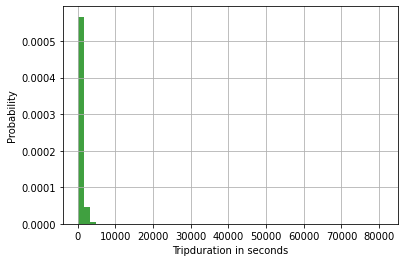

In [25]:
# the histogram of the data
n, bins, patches = plt.hist(df_chicago['Trip_Seconds'], 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripduration in seconds')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

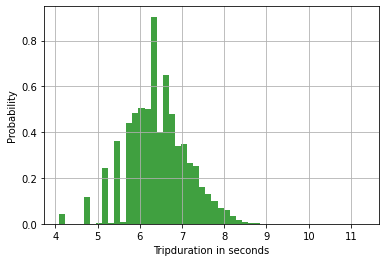

In [26]:
# the histogram of the data
n, bins, patches = plt.hist(np.log(df_chicago['Trip_Seconds']), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripduration in seconds')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

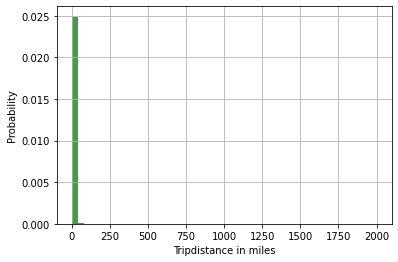

In [27]:
# the histogram of the data
n, bins, patches = plt.hist(df_chicago['Trip_Miles'], 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripdistance in miles')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

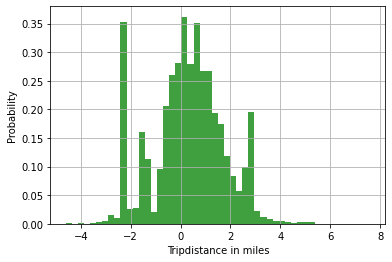

In [28]:
# the histogram of the data
n, bins, patches = plt.hist(np.log(df_chicago['Trip_Miles']), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Tripdistance in miles')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

### Remove outliers

In [29]:
from scipy.stats import zscore

def remove_outliers(df,excluded_cols=None,zscore_threshold=2,verbose=False):
    
    outlier_count = 0
    df_numeric_view = df.select_dtypes(include="number")

    for col in df_numeric_view.columns:
        if excluded_cols and col in excluded_cols:
            continue
        df[f"{col}_zscore"] = np.around(np.abs(zscore(np.log(df[col]))), decimals=1)
        outlier = df[df[f"{col}_zscore"] > zscore_threshold]
        outlier_count += outlier.shape[0]
        df.drop(outlier.index, inplace=True)
        if verbose:
            print(
                f"--> {outlier.shape[0]} outlier detected and removed from {col} column using zscore"
            )
    df = df.loc[:, ~df.columns.str.contains("zscore")]

    print(f"Outlier detection completed. Number of removed outlier: {outlier_count}")

    return df.reset_index(drop=True)

In [69]:
df_chicago = remove_outliers(df_chicago,excluded_cols=['Trip_ID','Taxi_ID','Trip_Start_Timestamp',
                            'Trip_End_Timestamp','Pickup_Census_Tract','Dropoff_Census_Tract', 
                            'Pickup_Community_Area','Dropoff_Community_Area','Fare','Tips','Tolls','Extras',
                            'Payment_Type','Company','Pickup_Centroid_Latitude','Pickup_Centroid_Longitude',
                            'Pickup_Centroid_Location','Dropoff_Centroid_Latitude','Dropoff_Centroid_Longitude',
                            'Dropoff_Centroid__Location','Community_Areas','date_start']
                             ,zscore_threshold=2,verbose=True)

--> 450113 outlier detected and removed from Trip_Seconds column using zscore
--> 128895 outlier detected and removed from Trip_Miles column using zscore


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


--> 0 outlier detected and removed from Trip_Total column using zscore
Outlier detection completed. Number of removed outlier: 579008


In [71]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399895 entries, 0 to 7399894
Data columns (total 25 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Trip_ID                     object        
 1   Taxi_ID                     object        
 2   Trip_Start_Timestamp        datetime64[ns]
 3   Trip_End_Timestamp          datetime64[ns]
 4   Trip_Seconds                float64       
 5   Trip_Miles                  float64       
 6   Pickup_Census_Tract         float64       
 7   Dropoff_Census_Tract        float64       
 8   Pickup_Community_Area       float64       
 9   Dropoff_Community_Area      float64       
 10  Fare                        float64       
 11  Tips                        float64       
 12  Tolls                       float64       
 13  Extras                      float64       
 14  Trip_Total                  float64       
 15  Payment_Type                object        
 16  Company           

**FEATURE: `dayOfWeek`**

In [26]:
df_chicago['dayOfWeek'] = pd.to_datetime(df_chicago["date_start"]).dt.day_name()
df_chicago

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location,Community_Areas,date_start,dayOfWeek
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:15:00,900.0,2.7,NaN,NaN,28.0,8.0,...,NaN,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),29.0,2013-01-01,Tuesday
1,7a3c9ab6e4da5c35448753e981bb73065a0c0319,efce437d4bc2a79b12ac131e37789da8fe5e53f37d12c2...,2013-01-01 00:00:00,2013-01-01 00:00:00,60.0,0.3,1.703132e+10,1.703132e+10,32.0,32.0,...,NaN,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),38.0,2013-01-01,Tuesday
2,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,NaN,41.928967,-87.656157,POINT (-87.6561568309 41.9289672664),41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),68.0,2013-01-01,Tuesday
3,235977a4b76994e0506b2c1775ad7b6a616140da,99d30118c79bf4b5f037d2d26660bb2dbca0994fc503e2...,2013-01-01 00:00:00,2013-01-01 00:30:00,1440.0,1.2,1.703198e+10,1.703184e+10,76.0,34.0,...,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),75.0,2013-01-01,Tuesday
4,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01 00:00:00,2013-01-01 00:30:00,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,Blue Ribbon Taxi Association Inc.,41.921126,-87.699754,POINT (-87.6997544065 41.9211259143),41.966834,-87.684018,POINT (-87.6840183712 41.9668340674),23.0,2013-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182419,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2013-12-31 23:45:00,2013-12-31 23:45:00,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,American United,41.941556,-87.666289,POINT (-87.6662888874 41.941555829),41.965446,-87.663196,POINT (-87.6631958495 41.9654457842),57.0,2013-12-31,Tuesday
11182420,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-12-31 23:45:00,2014-01-01 00:15:00,1952.0,8.5,NaN,NaN,28.0,6.0,...,American United,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),29.0,2013-12-31,Tuesday
11182421,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2013-12-31 23:45:00,2013-12-31 23:45:00,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,American United,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),38.0,2013-12-31,Tuesday
11182422,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2013-12-31 23:45:00,2013-12-31 23:45:00,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,American United,41.942577,-87.647079,POINT (-87.6470785093 41.942577185),41.934540,-87.643023,POINT (-87.6430228044 41.93453971580001),57.0,2013-12-31,Tuesday


**FEATURE: `isHoliday`**

In [27]:
from datetime import date
import holidays

# Select country
us_holidays = holidays.US()
us_holidays

holidays.country_holidays('US')

In [28]:
df_chicago = df_chicago.assign(isHoliday=lambda x: x["date_start"].apply(lambda h: h in us_holidays))

**FEATURE: `season`**

In [29]:
# Returns the day of the year
def day_match(ts):
    return pd.Period(ts, freq='D').day_of_year

#seasons = {'spring': (start='2013-03-20', end='2013-06-20'),
#           'summer': (start='2013/06/21', end='2013/09/22'),
#           'autumn': (start='2013/09/23', end='2013/12/21'),
#           'winter': rest}

# Create Array to map days to seasons (1 - 4)
seasons = ['winter' for i in range(0,78)]
seasons.extend('spring' for i in range(0,93))
seasons.extend('summer' for i in range(0,94))
seasons.extend('autumn' for i in range(0,90))
seasons.extend('winter' for i in range(0,10))

# Create dictionary for lambda expression
day_to_season = {}
for i in range(0,365):
    day_to_season[i+1] = seasons[i]
    
# Map start_date to day of the year (day_match) and afterwards map this to seasonnames (day_to_season)
df_chicago["season"] = df_chicago["date_start"].map(day_match).map(day_to_season)

In [30]:
print("In 2013 there were:\n", 
      "•", pd.Period("2013-03-19").day_of_year + (pd.Period("2013-12-31").day_of_year - pd.Period("2013/12/21").day_of_year), "winter days\n", 
      "•", pd.Period("2013/06/20").day_of_year - pd.Period("2013-03-19").day_of_year, "spring days\n",
      "•", pd.Period("2013/09/22").day_of_year - pd.Period("2013/06/20").day_of_year, "summer days\n",
      "•", pd.Period("2013/12/21").day_of_year - pd.Period("2013/09/22").day_of_year, "autumn days\n")

In 2013 there were:
 • 88 winter days
 • 93 spring days
 • 94 summer days
 • 90 autumn days



**FEATURE: `isRushhour`**

In [31]:
df_chicago['start_time_hourly'] = df_chicago['Trip_Start_Timestamp'].dt.hour

In [32]:
# Create feature isRushour
def isRushhour(time):
    if (time in [7,8,9,16,17,18,19]):
        return True
    else: 
        return False

df_chicago['isRushhour'] = df_chicago['start_time_hourly'].apply(lambda x:isRushhour(x))
df_chicago

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location,Community_Areas,date_start,dayOfWeek,isHoliday,season,start_time_hourly,isRushhour
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:15:00,900.0,2.7,NaN,NaN,28.0,8.0,...,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),29.0,2013-01-01,Tuesday,True,winter,0,False
1,7a3c9ab6e4da5c35448753e981bb73065a0c0319,efce437d4bc2a79b12ac131e37789da8fe5e53f37d12c2...,2013-01-01 00:00:00,2013-01-01 00:00:00,60.0,0.3,1.703132e+10,1.703132e+10,32.0,32.0,...,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),38.0,2013-01-01,Tuesday,True,winter,0,False
2,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),68.0,2013-01-01,Tuesday,True,winter,0,False
3,235977a4b76994e0506b2c1775ad7b6a616140da,99d30118c79bf4b5f037d2d26660bb2dbca0994fc503e2...,2013-01-01 00:00:00,2013-01-01 00:30:00,1440.0,1.2,1.703198e+10,1.703184e+10,76.0,34.0,...,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),75.0,2013-01-01,Tuesday,True,winter,0,False
4,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01 00:00:00,2013-01-01 00:30:00,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,41.966834,-87.684018,POINT (-87.6840183712 41.9668340674),23.0,2013-01-01,Tuesday,True,winter,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182419,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2013-12-31 23:45:00,2013-12-31 23:45:00,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,41.965446,-87.663196,POINT (-87.6631958495 41.9654457842),57.0,2013-12-31,Tuesday,False,winter,23,False
11182420,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-12-31 23:45:00,2014-01-01 00:15:00,1952.0,8.5,NaN,NaN,28.0,6.0,...,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),29.0,2013-12-31,Tuesday,False,winter,23,False
11182421,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2013-12-31 23:45:00,2013-12-31 23:45:00,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),38.0,2013-12-31,Tuesday,False,winter,23,False
11182422,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2013-12-31 23:45:00,2013-12-31 23:45:00,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,41.934540,-87.643023,POINT (-87.6430228044 41.93453971580001),57.0,2013-12-31,Tuesday,False,winter,23,False


**FEATURE: `velocity (km/h)`**

In [33]:
#brauchen noch km 

#df_chicago['velocity (km/h)'] = dfPhiladelphia['distance (km)']/(dfPhiladelphia['tripduration_sec']/3600)

**Rounding `Trip_Start_Timestamp` and `Trip_End_Timestamp` to hour**

In [80]:
# Rounding time of df_chicago to hour
df_chicago['Trip_Start_Timestamp'] = df_chicago["Trip_Start_Timestamp"].dt.round("H")
df_chicago['Trip_End_Timestamp'] = df_chicago["Trip_End_Timestamp"].dt.round("H")
df_chicago

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,date_start,dayOfWeek,isHoliday,season,start_time_hourly,isRushhour,hour_start,hour_start_rounded,hour_end,hour_end_rounded
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01,2013-01-01,900.0,2.7,NaN,NaN,28.0,8.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01,1970-01-01,00:15:00,1970-01-01
1,7a3c9ab6e4da5c35448753e981bb73065a0c0319,efce437d4bc2a79b12ac131e37789da8fe5e53f37d12c2...,2013-01-01,2013-01-01,60.0,0.3,1.703132e+10,1.703132e+10,32.0,32.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01,1970-01-01,00:00:00,1970-01-01
2,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01,2013-01-01,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01,1970-01-01,00:00:00,1970-01-01
3,235977a4b76994e0506b2c1775ad7b6a616140da,99d30118c79bf4b5f037d2d26660bb2dbca0994fc503e2...,2013-01-01,2013-01-01,1440.0,1.2,1.703198e+10,1.703184e+10,76.0,34.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01,1970-01-01,00:30:00,1970-01-01
4,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01,2013-01-01,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01,1970-01-01,00:30:00,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182419,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2014-01-01,2014-01-01,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
11182420,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2014-01-01,2014-01-01,1952.0,8.5,NaN,NaN,28.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,00:15:00,1970-01-01
11182421,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2014-01-01,2014-01-01,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
11182422,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2014-01-01,2014-01-01,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01


In [81]:
filtered_df = df_chicago[df_chicago['Trip_Start_Timestamp'] == '2014-01-01 00:00:00']
filtered_df

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,date_start,dayOfWeek,isHoliday,season,start_time_hourly,isRushhour,hour_start,hour_start_rounded,hour_end,hour_end_rounded
11180619,f51495eebc69339c830ad4e4db98075125384881,f22d7d05da8fadc4042d04cc6b6ba9a6b64cf3ee814f17...,2014-01-01,2014-01-01,420.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
11180620,89d5a4fc778dd1df246d471bc72d13543a195a4a,c6807fe98e33585260bb5f2c36641cbe6660e6526ddc9d...,2014-01-01,2014-01-01,540.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:30:00,1970-01-01
11180621,49a0db94a2747c4be8d464e9267b0a63a3acaec5,eb45a5cf86f97931ee27a489ee764c997bcfdf01b5f21b...,2014-01-01,2014-01-01,840.0,3.9,1.703108e+10,1.703183e+10,8.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
11180622,6c71706d147f92cd42f34e9ff0f07d28ccff4fb9,379e0fd9da136cabc9eec3aca37047bbdee373ca2ef7a0...,2014-01-01,2014-01-01,1740.0,5.7,1.703124e+10,1.703103e+10,24.0,3.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,00:00:00,1970-01-01
11180623,bac1e647f054b9c315be4864cd76c6a61bb20c48,9bfe44a96dc53f0266337b9ed5c6a81d10e00267e42ac7...,2014-01-01,2014-01-01,1200.0,0.2,1.703107e+10,1.703105e+10,7.0,5.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182419,a155865e7578ddd52ed77443c6fed7f981c694b1,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2014-01-01,2014-01-01,536.0,1.6,1.703106e+10,1.703103e+10,6.0,3.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
11182420,35a5fe3a96ad453a9276112136c934a87379e8a5,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2014-01-01,2014-01-01,1952.0,8.5,NaN,NaN,28.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,00:15:00,1970-01-01
11182421,f6fa0574a62cab2fec2c9ea2cc075f8ff6ee19e5,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2014-01-01,2014-01-01,262.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01
11182422,de95a68aae83de22d19a7999111f249e90eae812,5866e731fed5c82556c87a73b3ec2e19dd13d4cdc46a34...,2014-01-01,2014-01-01,352.0,0.7,1.703106e+10,1.703106e+10,6.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01,1970-01-01,23:45:00,1970-01-01


In [83]:
df_chicago = df_chicago[(df_chicago['Trip_Start_Timestamp']>=datetime.datetime(year=2013, month=1, day=1, hour=0, minute=0, second=0))
         & (df_chicago['Trip_Start_Timestamp']<datetime.datetime(year=2014, month=1, day=1, hour=0, minute=0, second=0))]

# Reset index to new time intervall of 2019
df_chicago.reset_index(drop=True, inplace=True)


In [84]:
df_chicago

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,date_start,dayOfWeek,isHoliday,season,start_time_hourly,isRushhour,hour_start,hour_start_rounded,hour_end,hour_end_rounded
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:00:00,900.0,2.7,NaN,NaN,28.0,8.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01 00:00:00.000000000,1970-01-01,00:15:00,1970-01-01
1,7a3c9ab6e4da5c35448753e981bb73065a0c0319,efce437d4bc2a79b12ac131e37789da8fe5e53f37d12c2...,2013-01-01 00:00:00,2013-01-01 00:00:00,60.0,0.3,1.703132e+10,1.703132e+10,32.0,32.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01 00:00:00.000000000,1970-01-01,00:00:00,1970-01-01
2,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01 00:00:00.000000000,1970-01-01,00:00:00,1970-01-01
3,235977a4b76994e0506b2c1775ad7b6a616140da,99d30118c79bf4b5f037d2d26660bb2dbca0994fc503e2...,2013-01-01 00:00:00,2013-01-01 00:00:00,1440.0,1.2,1.703198e+10,1.703184e+10,76.0,34.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01 00:00:00.000000000,1970-01-01,00:30:00,1970-01-01
4,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01 00:00:00,2013-01-01 00:00:00,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,2013-01-01,Tuesday,True,winter,0,False,1970-01-01 00:00:00.000000000,1970-01-01,00:30:00,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180614,7c0fb7640b1c0d663884cef2d1aa5550ede5c44a,c01573d08b208b89c0fdf054d7bc2820fe2abb9d326a80...,2013-12-31 23:00:00,2013-12-31 23:00:00,438.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01 00:00:00.000000023,1970-01-01,23:15:00,1970-01-01
11180615,65d47e87ed7f074c4a4852f2d9fd73460e777f01,1931d4a8bc7885e0be16cec11ac2aba5c1af611506e065...,2013-12-31 23:00:00,2014-01-01 00:00:00,694.0,1.1,1.703106e+10,1.703106e+10,6.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01 00:00:00.000000023,1970-01-01,23:30:00,1970-01-01
11180616,a2d66da7717a9a510111b8640b367a730974f4e9,ef5eff6bb140de6acea46bf7980c2547b6d2486f1f8310...,2013-12-31 23:00:00,2014-01-01 00:00:00,695.0,1.6,1.703106e+10,1.703106e+10,6.0,6.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01 00:00:00.000000023,1970-01-01,23:30:00,1970-01-01
11180617,beea74101e1d63ae680d5f9a92938530318026ec,bc1bb780dd36d5c571b58fbf28f2942790b6ec912bc3a5...,2013-12-31 23:00:00,2013-12-31 23:00:00,365.0,1.3,NaN,NaN,22.0,20.0,...,2013-12-31,Tuesday,False,winter,23,False,1970-01-01 00:00:00.000000023,1970-01-01,23:15:00,1970-01-01


## Weather

In [35]:
#df_Weather = pd.read_csv("https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-hourly&stations=72534014819&startDate=2013-01-01&endDate=2013-12-31&format=csv&units=metric")


In [36]:
#df_Weather.dropna(axis=1, how = 'any')

In [37]:
#df_Weather.info()